In [45]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Name of the model
nome = "nosint-sel"
model_dir = f"modelli/{nome}"

In [46]:
# Import validation data on the fine-tuning phase
try:
    with open(f"{model_dir}/val_loss_tune.txt", "r") as f:
        fineV_loss = [float(line.strip()) for line in f.readlines()]
        
    with open(f"{model_dir}/val_acc_tune.txt", "r") as f:
        fineV_acc = [float(line.strip()) for line in f.readlines()]
    
except:
    print("Fine-tuning data not found.")

In [47]:
# Import validation data on the training phase
try:
    with open(f"{model_dir}/val_loss.txt", "r") as f:
        val_loss = [float(line.strip()) for line in f.readlines()]
        
    with open(f"{model_dir}/val_acc.txt", "r") as f:
        val_acc = [float(line.strip()) for line in f.readlines()]
    
except:
    print("Validation data not found.")

## Plotting loss and accuracy during fine-tuning

[1.5361182689666748, 1.52583909034729, 1.5282748937606812, 1.4483188390731812, 1.5348018407821655, 1.4761168956756592, 1.5037676095962524, 1.5218852758407593, 1.4788507223129272, 1.5504158735275269, 1.631435513496399, 1.6665380001068115, 1.7689276933670044]


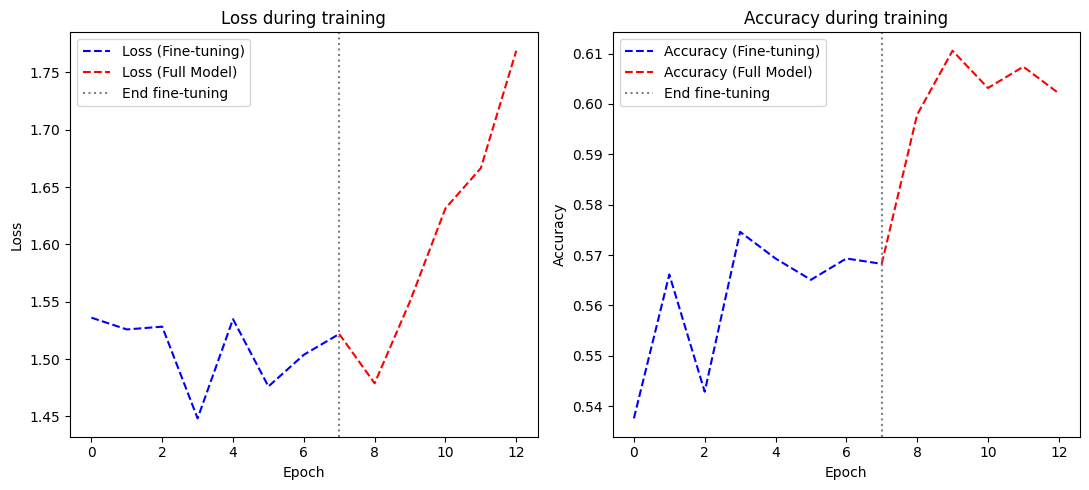

In [48]:
all_loss = fineV_loss + val_loss
all_acc = fineV_acc + val_acc
fig, ax = plt.subplots(1, 2, figsize=(11, 5))
print(all_loss)

# Epochs and split point
total_epochs = len(all_loss)
x = range(total_epochs)
split_point = len(fineV_loss)

# Loss plot
ax[0].plot(x[:split_point], all_loss[:split_point], color='blue', linestyle='--', label='Loss (Fine-tuning)')
ax[0].plot(x[split_point-1:], all_loss[split_point-1:], color='red', linestyle='--', label='Loss (Full Model)')

# Vertical line
ax[0].axvline(x=split_point-1, color='gray', linestyle=':', label='End fine-tuning')

# Labels and title
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss during training')
ax[0].legend()

# Accuracy plot
ax[1].plot(x[:split_point], all_acc[:split_point], color='blue', linestyle='--', label='Accuracy (Fine-tuning)')
ax[1].plot(x[split_point-1:], all_acc[split_point-1:], color='red', linestyle='--', label='Accuracy (Full Model)')

# Vertical line
ax[1].axvline(x=split_point-1, color='gray', linestyle=':', label='End fine-tuning')

# Labels and title
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Accuracy during training')
ax[1].legend()

fig.tight_layout()
plt.show()

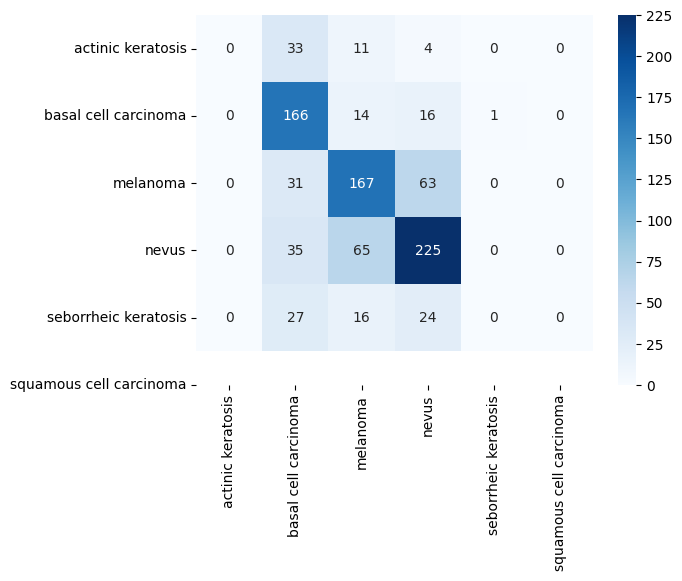

In [52]:
# Get confusion matrix
confusion_matrix_data = np.array([
    [0, 33, 11, 4, 0, 0],
    [0, 166, 14, 16, 1, 0],
    [0, 31, 167,  63, 0, 0],
    [0, 35, 65, 225, 0, 0],
    [0, 27, 16, 24, 0, 0]
])

# Classes in the correct order
class_labels = [
    'actinic keratosis',
    'basal cell carcinoma',
    'melanoma',
    'nevus',
    'seborrheic keratosis',
    'squamous cell carcinoma'
]

# Plot heatmap
plt.figure()
sns.heatmap(confusion_matrix_data, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.show()